<a href="https://colab.research.google.com/github/SanjayS2348553/AiML/blob/main/2348553_ML_COMPONENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

DATA LOADING AND INSPECTION

In [ ]:
df=pd.read_csv('/content/2015.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [ ]:
df.shape

(158, 12)

MISSING VALUES

In [ ]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

BINNING

In [ ]:
bins = [0, 5.5, 6.5, 10]
labels = ['Low Happiness', 'Medium Happiness', 'High Happiness']
df['Happiness Score Group'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels)

ONE HOT ENCODING

In [ ]:
df_one_hot = pd.get_dummies(df, columns=['Region'])

print(df_one_hot)

         Country  Happiness Rank  Happiness Score  Standard Error  \
0    Switzerland               1            7.587         0.03411   
1        Iceland               2            7.561         0.04884   
2        Denmark               3            7.527         0.03328   
3         Norway               4            7.522         0.03880   
4         Canada               5            7.427         0.03553   
..           ...             ...              ...             ...   
153       Rwanda             154            3.465         0.03464   
154        Benin             155            3.340         0.03656   
155        Syria             156            3.006         0.05015   
156      Burundi             157            2.905         0.08658   
157         Togo             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                

NORMALIZATION

In [8]:
df_normalized = df_one_hot.copy()
df_normalized['Economy (GDP per capita)'] = df_normalized['Economy (GDP per capita)'].apply(
    lambda x: x / df_normalized['Economy (GDP per capita)'].max()
)

KeyError: ignored

Chi-Square Test:

In [9]:
contingency_table = pd.crosstab(df['Happiness Score Group'], df['Region'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('p-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between the Region and Happiness Rank columns.')
else:
    print('There is no significant association between the Region and Happiness Rank columns.')

Chi-square statistic: 112.5770063870112
p-value: 1.0404131105363673e-15
There is a significant association between the Region and Happiness Rank columns.


COVARIANCE MATRIX

In [10]:
covariance_matrix = df_normalized.corr()

<ipython-input-10-22937834760f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df_normalized.corr()


HEAT MAP

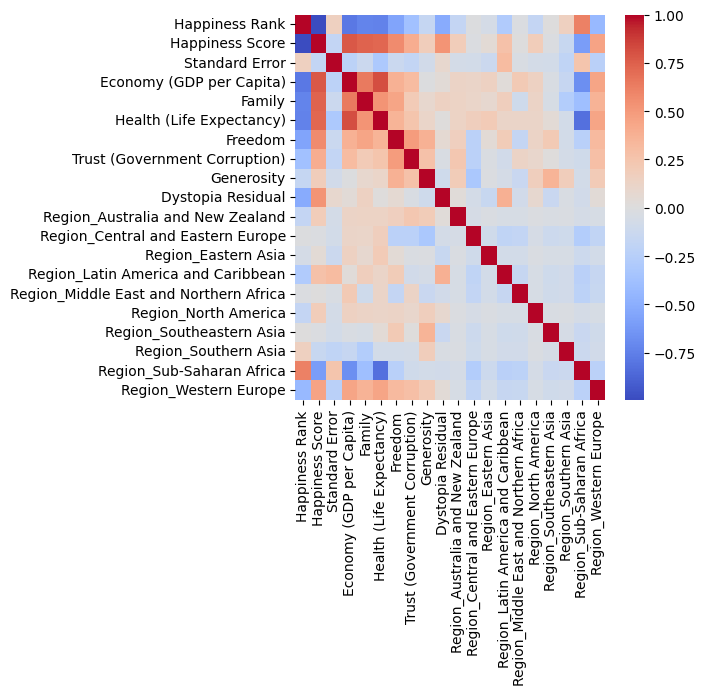

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(covariance_matrix, cmap='coolwarm')
plt.show()

VISUALIZATION

BAR CHART

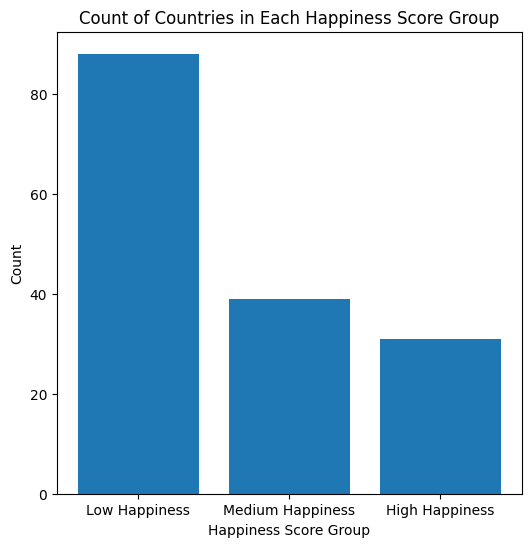

In [12]:
plt.figure(figsize=(6, 6))
plt.bar(df['Happiness Score Group'].value_counts().index, df['Happiness Score Group'].value_counts())
plt.xlabel('Happiness Score Group')
plt.ylabel('Count')
plt.title('Count of Countries in Each Happiness Score Group')
plt.show()

HISTOGRAM

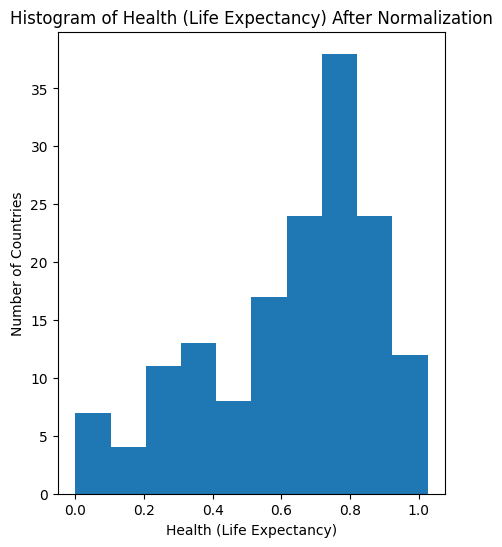

In [13]:
plt.figure(figsize=(5, 6))
plt.hist(df_normalized['Health (Life Expectancy)'])
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Number of Countries')
plt.title('Histogram of Health (Life Expectancy) After Normalization')
plt.show()

A STACKED BAR CHART

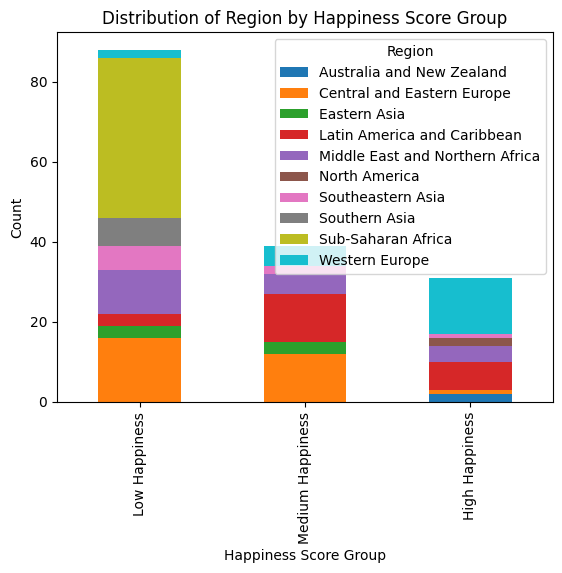

In [14]:
df_grouped = df.groupby(['Happiness Score Group', 'Region']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Happiness Score Group')
plt.ylabel('Count')
plt.title('Distribution of Region by Happiness Score Group')
plt.show()

HEAT MAP OF COVARIANCE MATRIX

<ipython-input-15-640673023639>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.corr()


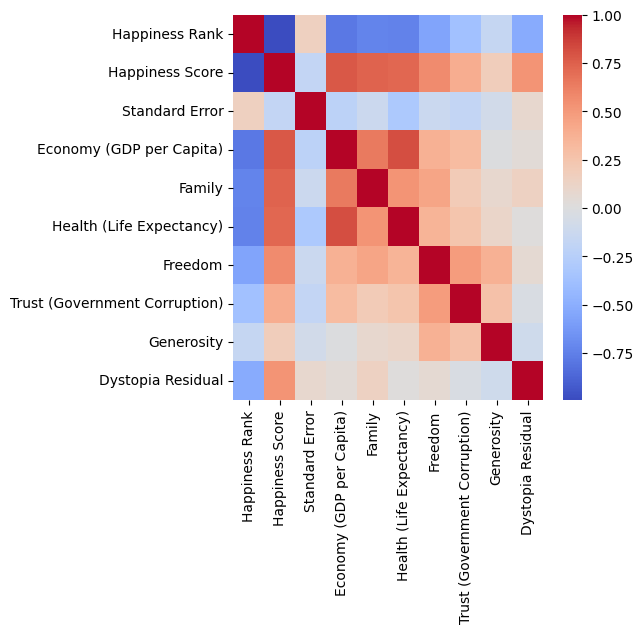

In [15]:
covariance_matrix = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(covariance_matrix, cmap='coolwarm')
plt.show()